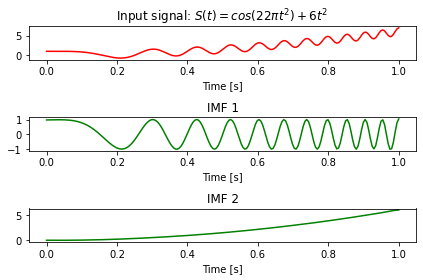

In [11]:

from PyEMD import EMD
import numpy  as np
import matplotlib.pyplot as plt

# Define signal
t = np.linspace(0, 1, 200)
s = np.cos(11*2*np.pi*t*t) + 6*t*t

# Execute EMD on signal
IMF = EMD().emd(s,t)
N = IMF.shape[0]+1

# Plot results
plt.subplot(N,1,1)
plt.plot(t, s, 'r')
plt.title("Input signal: $S(t)=cos(22\pi t^2) + 6t^2$")
plt.xlabel("Time [s]")

for n, imf in enumerate(IMF):
    plt.subplot(N,1,n+2)
    plt.plot(t, imf, 'g')
    plt.title("IMF "+str(n+1))
    plt.xlabel("Time [s]")

plt.tight_layout()
plt.savefig('simple_example')
plt.show()

from PyEMD import EMD
from PyEMD import EEMD
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#define signal
t = 'given_data'

#for file in .csv, load .csv file into t
t = pd.read_csv(t)
time = t['time']
time = np.array(time)
#type(time)  #check that time is iterable

rawdata = t['signal_to_be_processed']
rawdata = np.array(rawdata)
#type(rawdata)  #check that rawdata is iterable

# Assign EEMD to `eemd` variable
eemd = EEMD()

# # Execute CEEMDAN on signal
IMF = EEMD().eemd(time,rawdata)
N = IMF.shape[0]+1

# Plot results
plt.figure(figsize=(5,3), dpi = 300)
plt.subplot(N,1,1)
plt.plot(epoch,rawdata)
plt.title("Input signal: Time vs Raw Data")
plt.xlabel("Time [s]")
plt.tight_layout()

for n, imf in enumerate(IMF):
    plt.subplot(N,1,n+2)
    plt.plot(epoch, imf, 'g')
    plt.title("IMF "+str(n+1))
    plt.xlabel("Time")

plt.tight_layout()
#plt.savefig('EEMD_result.png', dpi = 300) 
plt.show()

In [22]:


#recommended tweaks for faster computation
from PyEMD import CEEMDAN

ceemdan = CEEMDAN(DTYPE=np.float16)
ceemdan = CEEMDAN(trials=20)
ceemdan = CEEMDAN(spline_kind = 'piecewise cubic')
ceemdan = CEEMDAN(trials=20)
ceemdan = CEEMDAN(max_imfs = 2)

<ipython-input-24-938391fce332>:36: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()
<ipython-input-24-938391fce332>:44: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


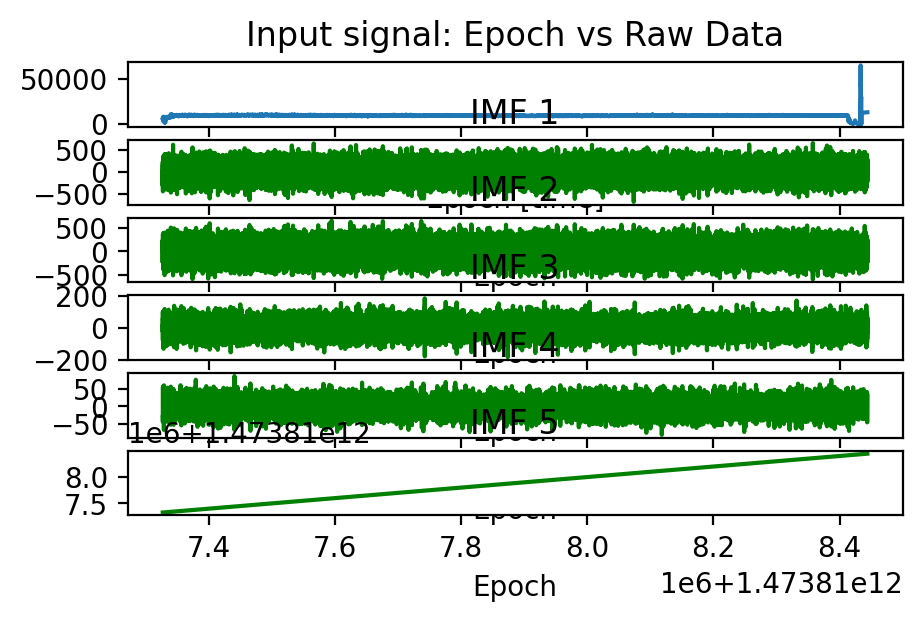

In [24]:
from PyEMD import EMD
from PyEMD import CEEMDAN
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#define signal
t = 'sample_data.csv'

t = pd.read_csv(t)
epoch = t['epoch']
epoch = np.array(epoch)
#type(epoch)

rawdata = t['raw_data_sleepMat']
rawdata = np.array(rawdata)
#type(rawdata)

# # Assign CEEMDAN to `ceemdan` variable
ceemdan = CEEMDAN()
#eemd = EEMD()

# # Execute CEEMDAN on signal
IMF = CEEMDAN().ceemdan(epoch,rawdata)

#IMF = EEMD().eemd(epoch,rawdata)
N = IMF.shape[0]+1

# Plot results
plt.figure(figsize=(5,3), dpi = 200)
plt.subplot(N,1,1)
plt.plot(epoch,rawdata)
plt.title("Input signal: Epoch vs Raw Data")
plt.xlabel("Epoch [time]")
plt.tight_layout()

for n, imf in enumerate(IMF):
    plt.subplot(N,1,n+2)
    plt.plot(epoch, imf, 'g')
    plt.title("IMF "+str(n+1))
    plt.xlabel("Epoch")

plt.tight_layout()
#plt.savefig('CEEMDAN 1.png', dpi = 300) 
plt.show()